In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Path where the data is stored
SOURCE_PATH = '../data'
# Directory inside SOURCE_PATH where the original data is stored
ORIGINAL_DATA_DIR = '/EXOSAFE'

# Number of force cells in the robotic leg
N_CELLS = 8

# Experiment params
DATE_EXPERIMENTS = '24022021'
ID_EXPERIMENT = 7

In [3]:
# Load some sample data
forces_df = pd.read_excel(SOURCE_PATH + ORIGINAL_DATA_DIR + '/' + DATE_EXPERIMENTS + '/0{}-'.format(ID_EXPERIMENT) + DATE_EXPERIMENTS + '.xlsx', sheet_name='ForceCells', usecols=[i for i in range(N_CELLS * 3)])

# Add the time of each measure (for visualization purposes only)
forces_df['Time'] = [i / 100 for i in range(1, len(forces_df) + 1)]

forces_df

F1x       F1y        F1z       F2x       F2y        F2z  \
0     -16.210976  6.237998  20.479969  18.65836 -7.876534  10.016513   
1     -16.210976  6.237998  20.479969  18.65836 -7.876534  10.016513   
2     -16.222312  6.270584  20.513368  18.70388 -7.903724  10.016513   
3     -16.222312  6.270584  20.513368  18.70388 -7.903724  10.016513   
4     -16.193972  6.237998  20.513368  18.66405 -7.930914  10.005050   
...          ...       ...        ...       ...       ...        ...   
17765  -5.872544 -2.891513   6.608251  -1.34199  0.204334   5.438955   
17766  -5.872544 -2.891513   6.608251  -1.34199  0.204334   5.438955   
17767  -5.118700 -2.652549   6.044179  -0.85265  0.035756   4.632724   
17768  -5.118700 -2.652549   6.044179  -0.85265  0.035756   4.632724   
17769  -5.056352 -2.277810   5.361355  -1.32492  0.149954   4.468421   

             F3x      F3y        F3z        F4x  ...        F6x       F6y  \
0     -11.433036 -56.8146  57.370152  23.345936  ... -19.756276  4.358756   
1     -11.433036 -56.8146  57.370152  23.345936  ... -19.756276  4.358756   
2     -11.669592 -56.9444  57.281840  23.373504  ... -19.721980  4.331191   
3     -11.669592 -56.9444  57.281840  23.373504  ... -19.721980  4.331191   
4     -11.682734 -56.8618  57.256608  23.290800  ... -19.739128  4.320165   
...          ...      ...        ...        ...  ...        ...       ...   
17765   9.541596 -26.0992  26.145552  -7.102920  ... -28.433164  6.602547   
17766   9.541596 -26.0992  26.145552  -7.102920  ... -28.433164  6.602547   
17767  -0.472608 -24.7776  27.306224 -11.775696  ... -25.443696  4.369782   
17768  -0.472608 -24.7776  27.306224 -11.775696  ... -25.443696  4.369782   
17769  -4.796326 -24.1050  25.338128 -15.331968  ... -28.724680  3.449111   

             F6z        F7x        F7y        F7z       F8x        F8y  \
0      44.472504 -38.263300 -12.477495 -13.608980  3.233926  14.790024   
1      44.472504 -38.263300 -12.477495 -13.608980  3.233926  14.790024   
2      44.491889 -38.263300 -12.465500 -13.625063  3.137620  14.850764   
3      44.491889 -38.263300 -12.465500 -13.625063  3.137620  14.850764   
4      44.480258 -38.317904 -12.573455 -13.625063  3.247684  14.814320   
...          ...        ...        ...        ...       ...        ...   
17765  38.998180 -13.773406  -7.967375  -7.770851  3.481570  10.076600   
17766  38.998180 -13.773406  -7.967375  -7.770851  3.481570  10.076600   
17767  38.021176 -14.046426  -8.867000  -8.655416  4.527178  10.064452   
17768  38.021176 -14.046426  -8.867000  -8.655416  4.527178  10.064452   
17769  40.335745 -14.319446  -9.646675  -8.784080  4.843612  10.671852   

          F8z    Time  
0      2.5752    0.01  
1      2.5752    0.02  
2      2.5240    0.03  
3      2.5240    0.04  
4      2.5752    0.05  
...       ...     ...  
17765 -1.5464  177.66  
17766 -1.5464  177.67  
17767 -1.3672  177.68  
17768 -1.3672  177.69  
17769 -1.5464  177.70  

[17770 rows x 25 columns]

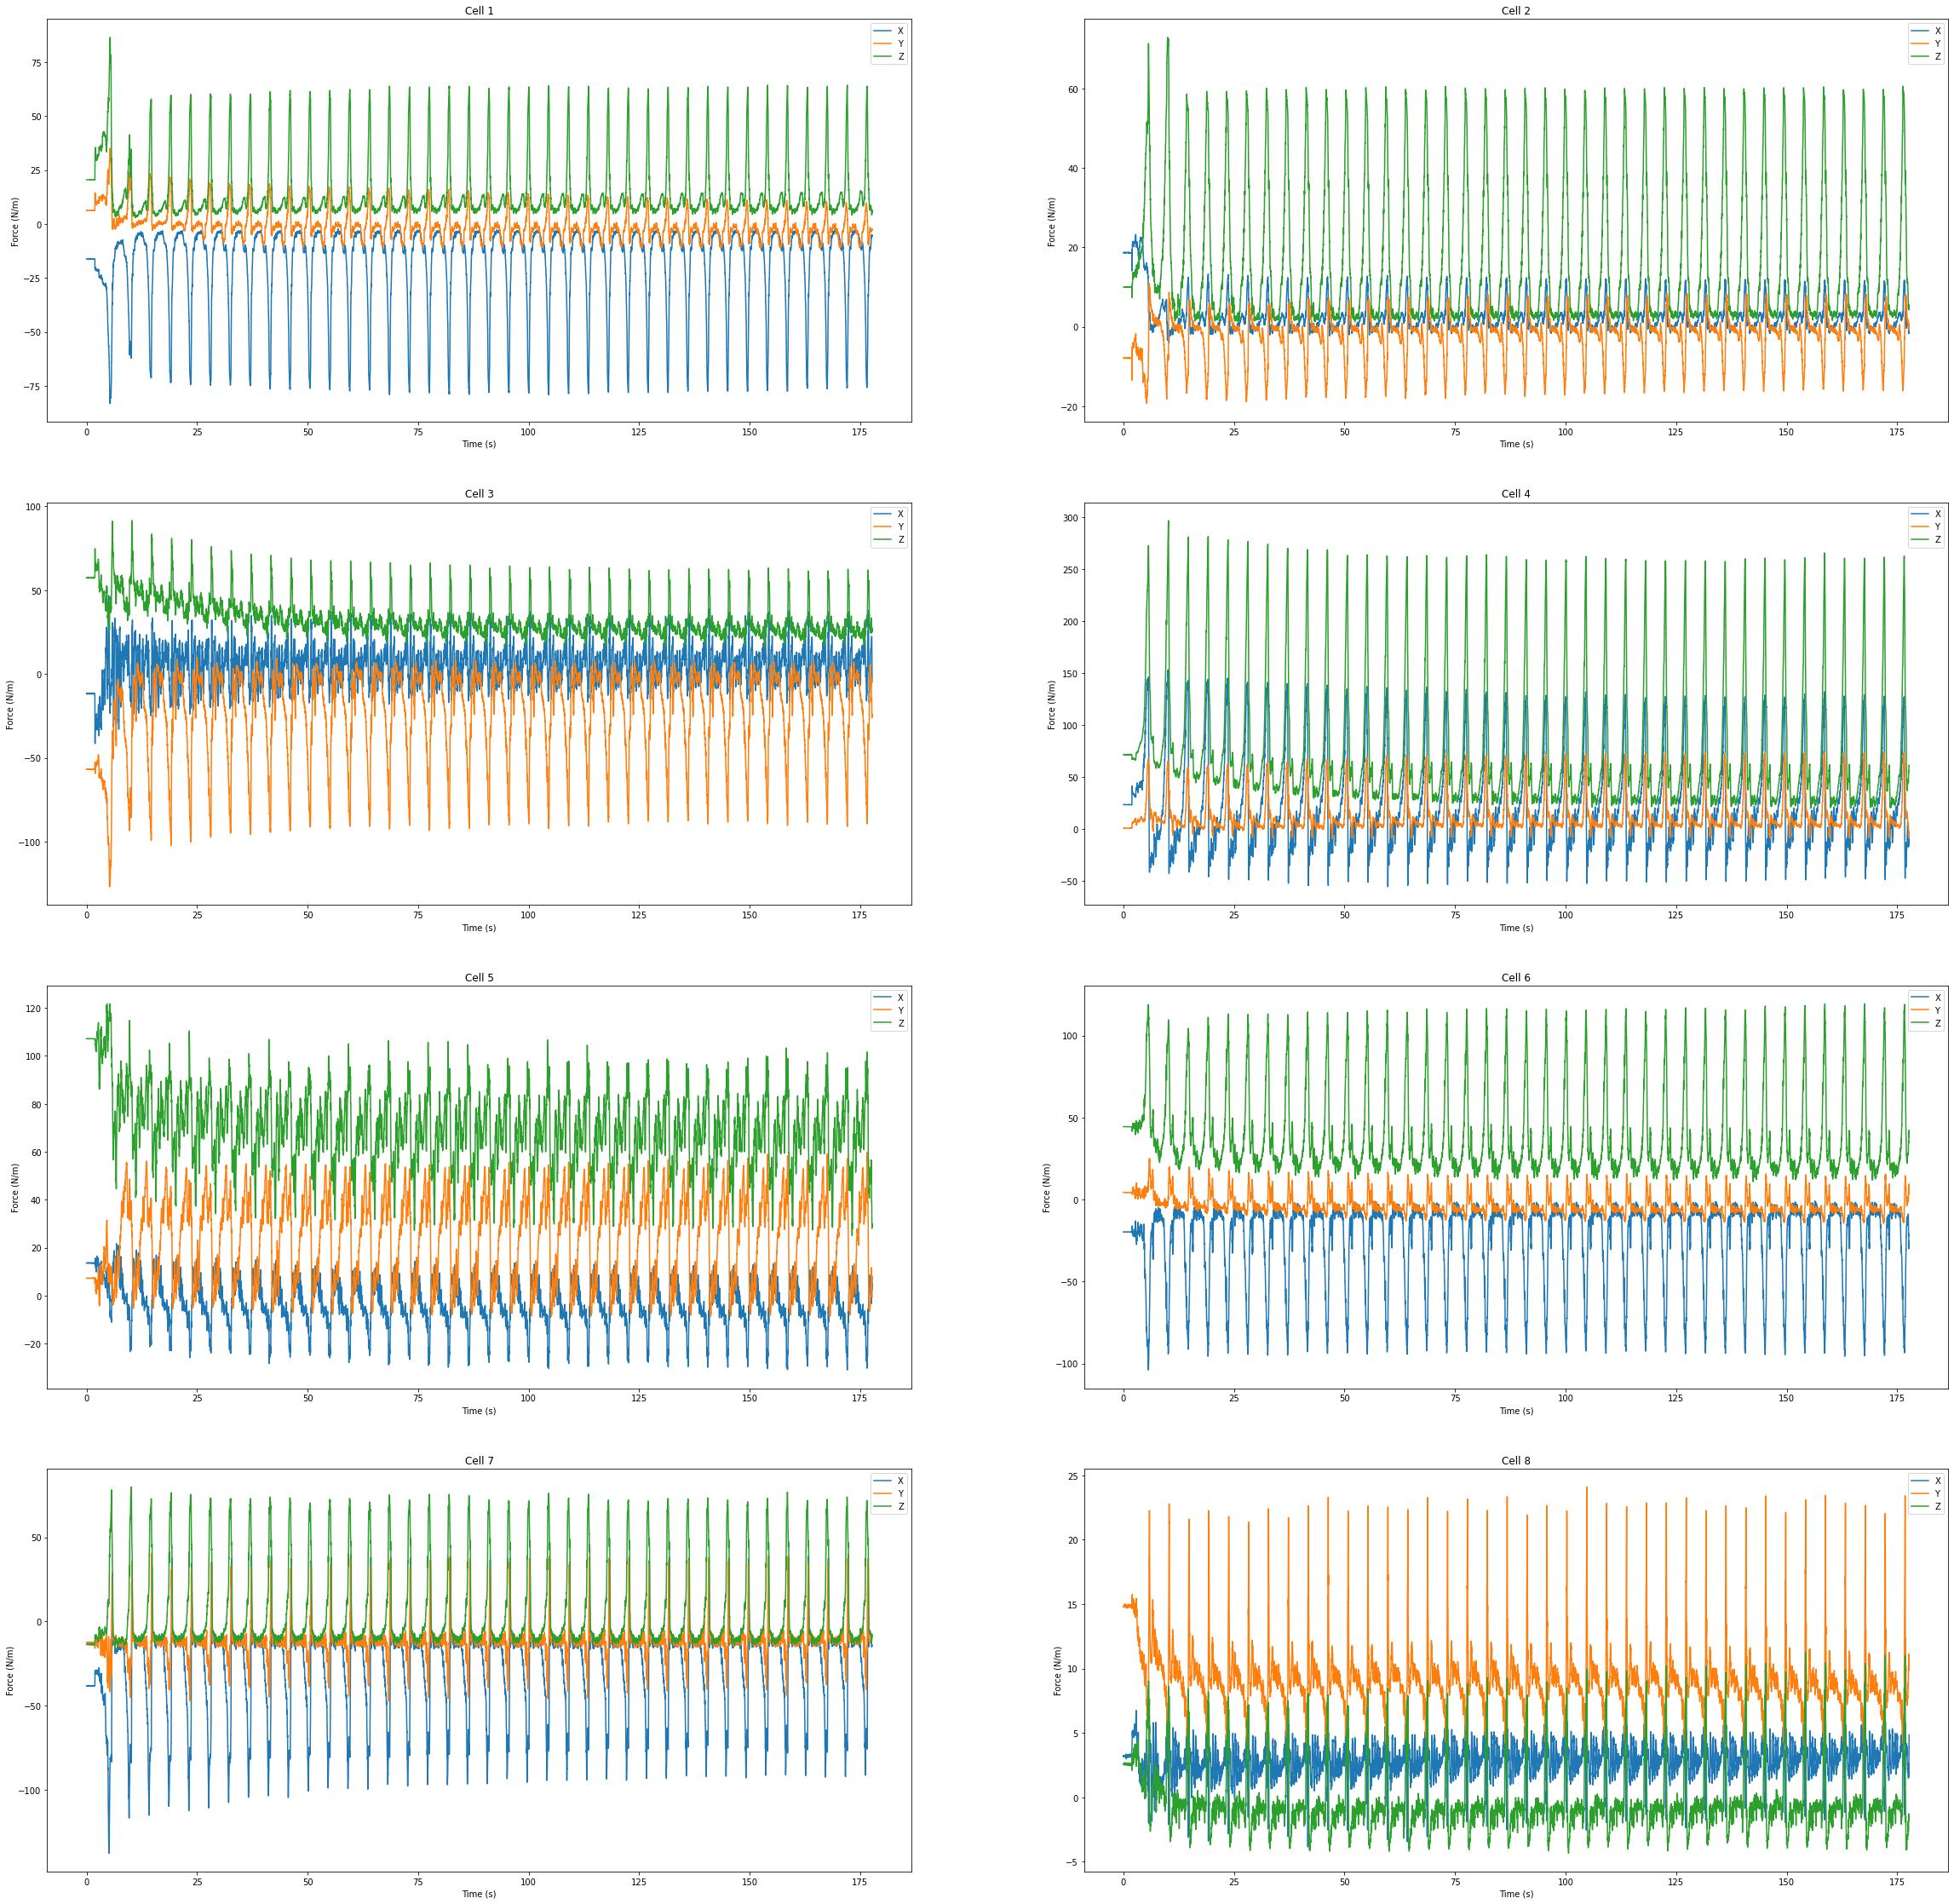

In [4]:
# Plot the data for each force cell (before the axis rotation)
plt.figure(figsize=(40,40))
for i in range (1, N_CELLS + 1):
    plt.subplot(4, 2, i)
    plt.plot(forces_df['Time'], forces_df['F{}x'.format(str(i))], label='X')
    plt.plot(forces_df['Time'], forces_df['F{}y'.format(str(i))], label='Y')
    plt.plot(forces_df['Time'], forces_df['F{}z'.format(str(i))], label='Z')
    plt.legend()
    plt.title('Cell {}'.format(str(i)))
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N/m)')

plt.show()

In [5]:
rotations = {
    1: [180, 90, 0],
    2: [180, 90, 0],
    3: [180, 0, -90],
    4: [0, 0, -90],
    5: [0, 0, 0],
    6: [0, 180, 0],
    7: [0, 90, 0],
    8: [0, 0, 90],
}

def rotate_vector(v, axis, angle):
    '''
    Args:
    - v (np.array): Vector to be rotated
    - axis (int): Axis along the rotation is performed
    - angle (int): Rotation angle
    
    Returns:
    - (np.array)): Rotated vector
    '''
    if axis == 0:
        # X
        v = v.dot(np.array([[1, 0, 0], [0, np.cos(np.radians(angle)), np.sin(np.radians(angle))], [0, np.sin(np.radians(angle)), np.cos(np.radians(angle))]]))
    elif axis == 1:
        # Y
        v = v.dot(np.array([[np.cos(np.radians(angle)), 0, np.sin(np.radians(angle))], [0, 1, 0], [-np.sin(np.radians(angle)), 0, np.cos(np.radians(angle))]]))
    elif axis == 2:
        # Z
        v = v.dot(np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0], [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0], [0, 0, 1]]))
    else:
        raise ValueError('Invalid axis')

    return v

# Apply the rotation matrix to each force vector
for i in tqdm(range(1, N_CELLS + 1)):
    cols = ['F{}x'.format(str(i)), 'F{}y'.format(str(i)), 'F{}z'.format(str(i))]
    for ax in range(3):
        forces_df[cols] = forces_df[cols].apply(lambda v: pd.Series(rotate_vector(v, ax, rotations[i][ax])), axis=1)


100%|██████████| 8/8 [02:07<00:00, 15.92s/it]


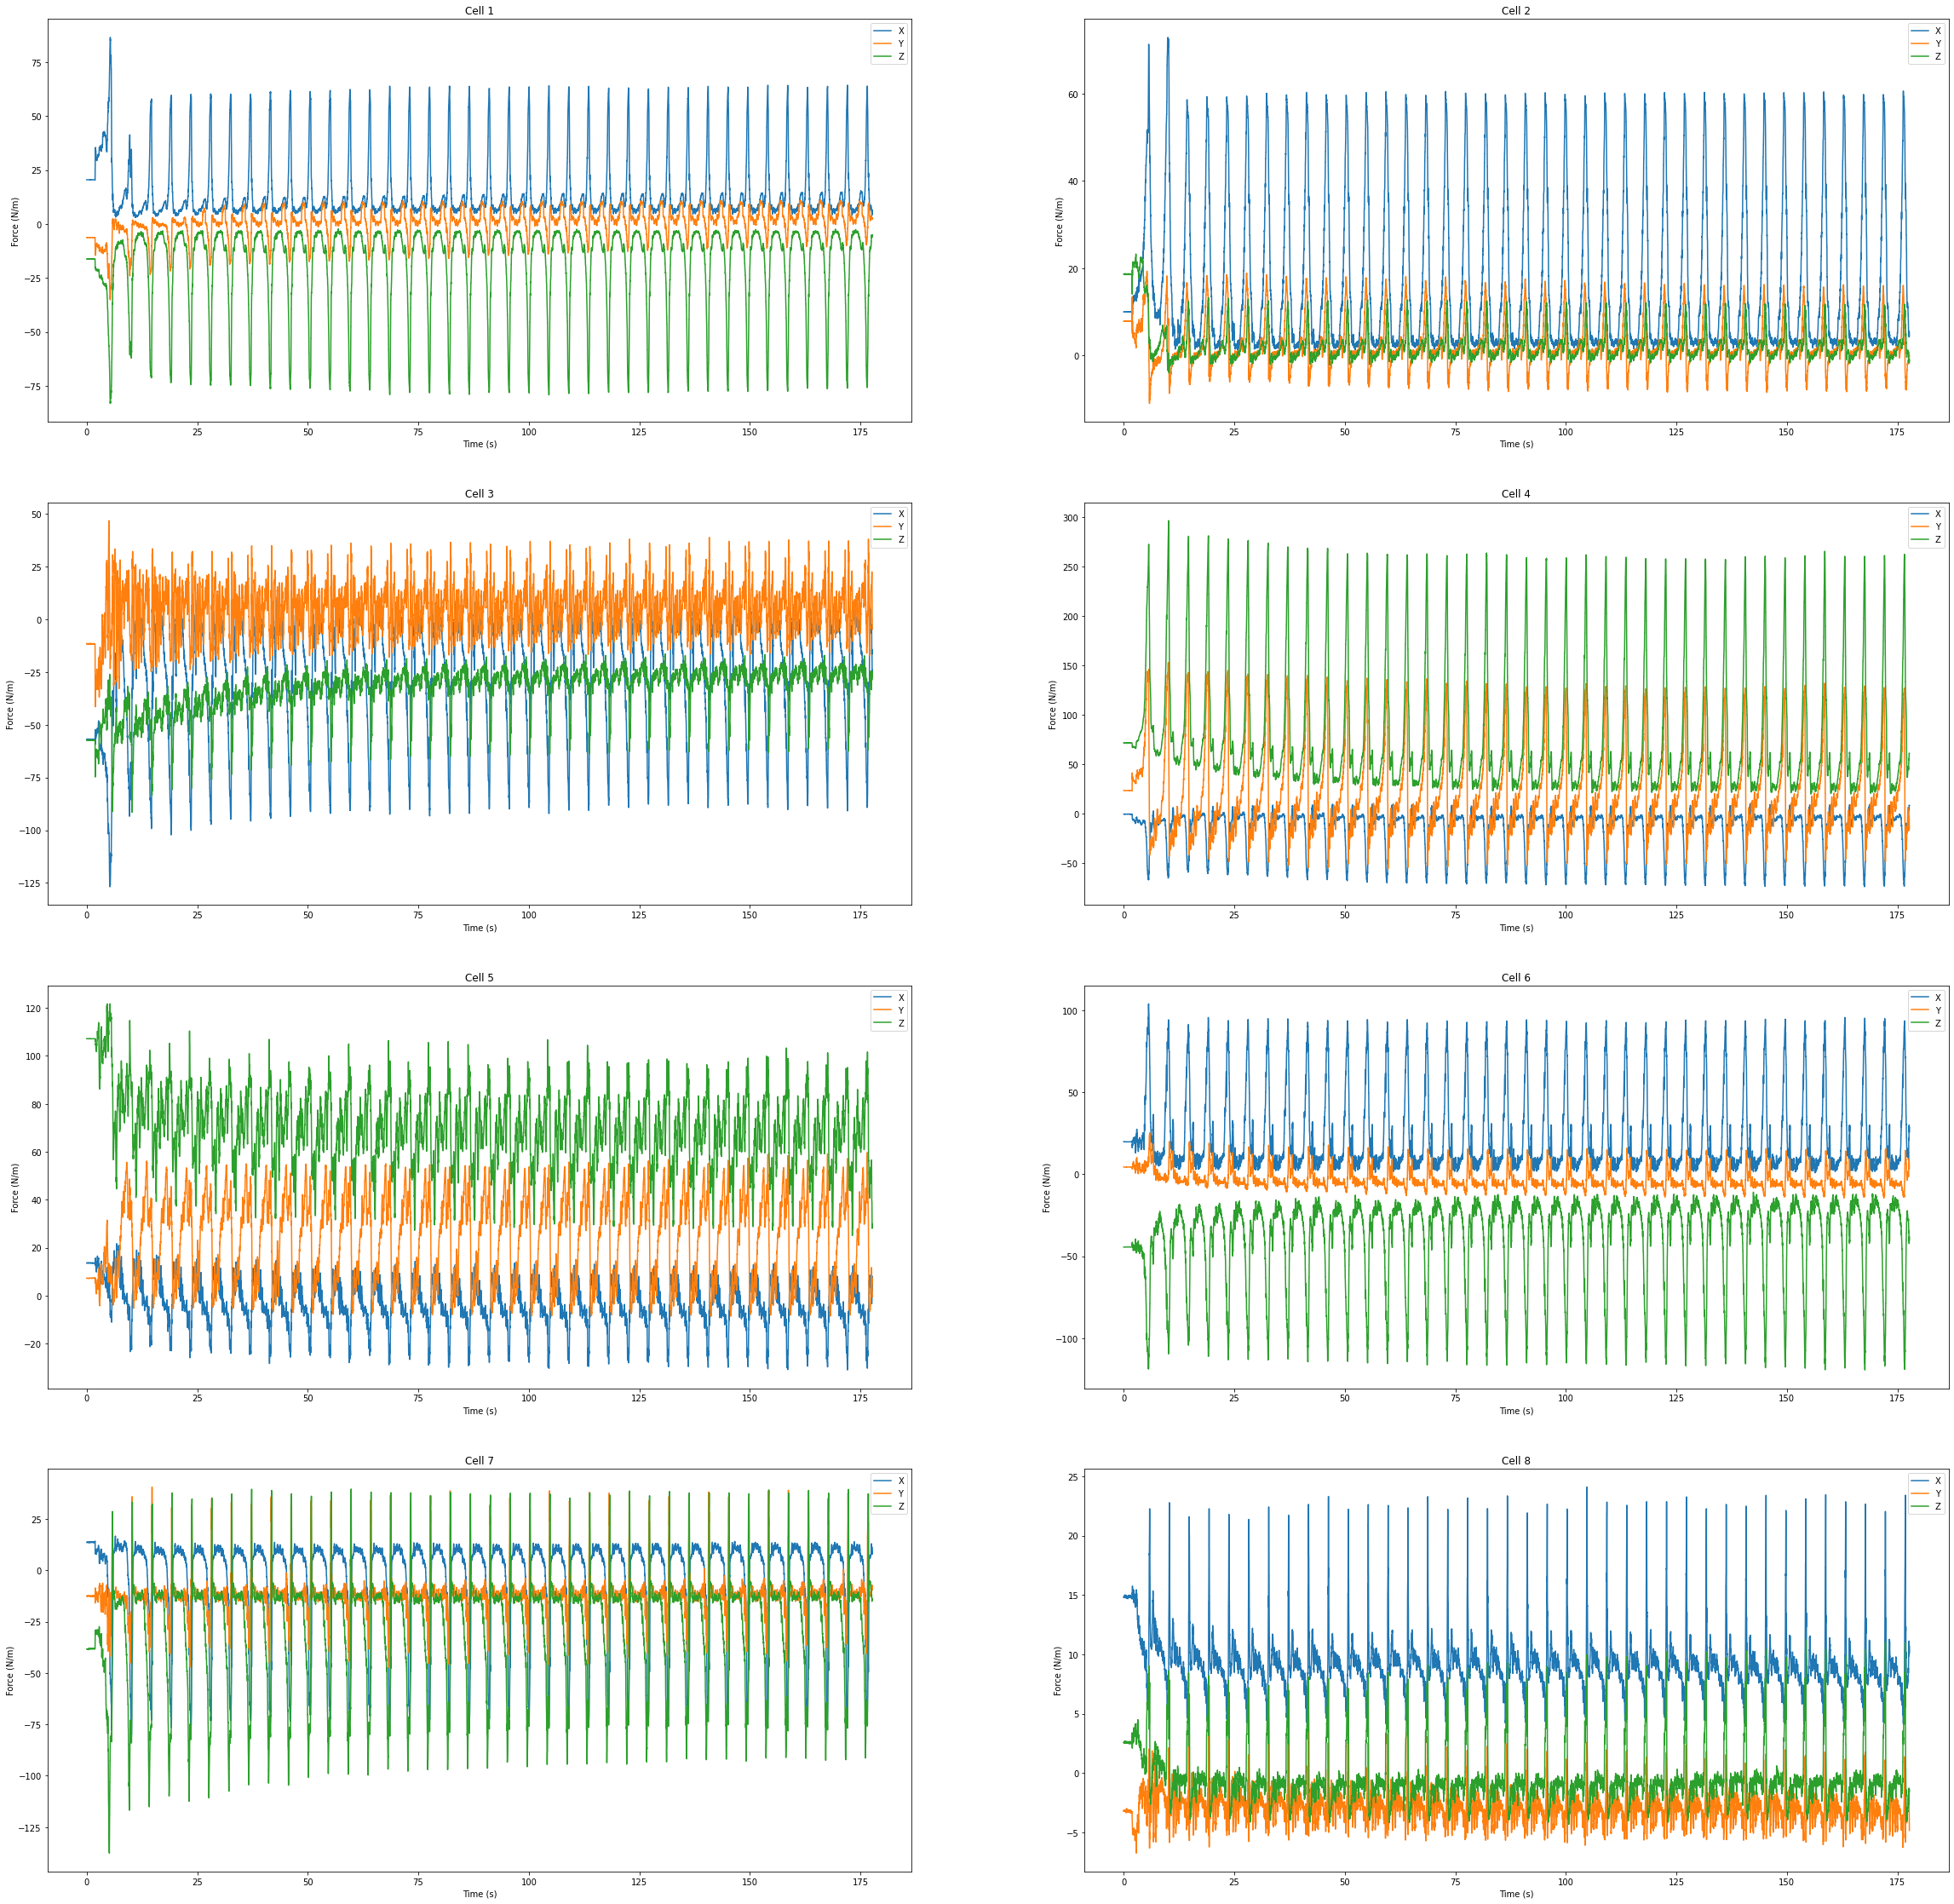

In [6]:
# Plot the data for each force cell (after the axis rotation)
plt.figure(figsize=(40,40))
for i in range (1, N_CELLS + 1):
    plt.subplot(4, 2, i)
    plt.plot(forces_df['Time'], forces_df['F{}x'.format(str(i))], label='X')
    plt.plot(forces_df['Time'], forces_df['F{}y'.format(str(i))], label='Y')
    plt.plot(forces_df['Time'], forces_df['F{}z'.format(str(i))], label='Z')
    plt.legend()
    plt.title('Cell {}'.format(str(i)))
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N/m)')

plt.show()